In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 499 non-null    object 
 1   Address               499 non-null    object 
 2   Avatar                499 non-null    object 
 3   Avg. Session Length   499 non-null    float64
 4   Time on App           499 non-null    float64
 5   Time on Website       499 non-null    float64
 6   Length of Membership  499 non-null    float64
 7   Yearly Amount Spent   499 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,499.000000,499.000000,499.000000,499.000000,499.000000
mean,33.056255,12.053916,37.060487,3.532905,499.424957
std,0.991194,0.994700,1.011503,1.000203,79.355548
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.347137,11.388629,36.346012,2.929280,445.406013
50%,33.085298,11.984418,37.071643,3.532862,499.140152
75%,33.713317,12.755623,37.716878,4.127420,549.496082
max,36.139662,15.126994,40.005182,6.922689,765.518462


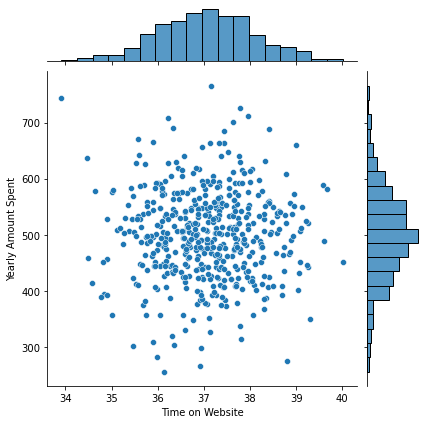

In [6]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent',data=customers)

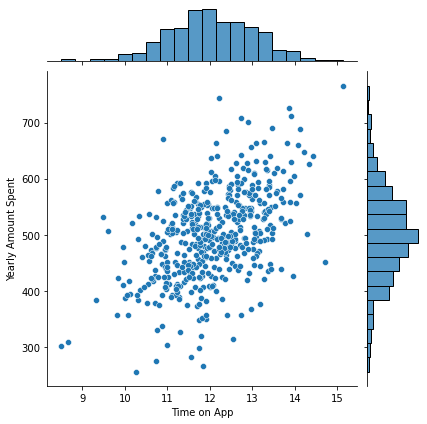

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent',data=customers)

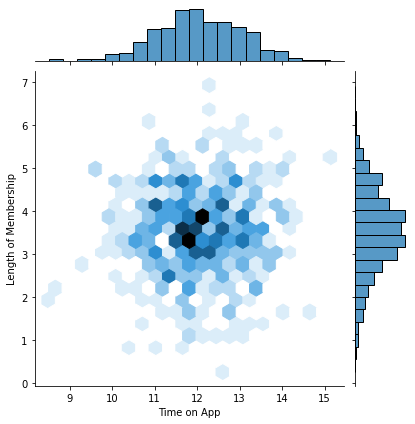

In [8]:
sns.jointplot(x='Time on App', y='Length of Membership',data=customers,kind='hex')

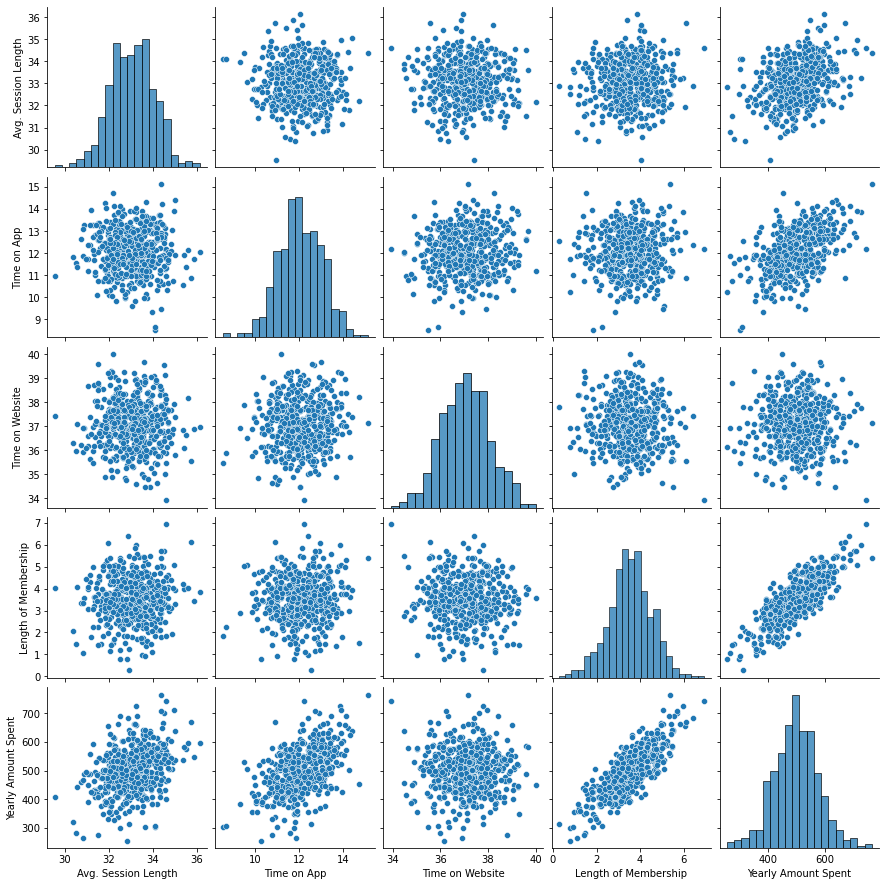

In [9]:
sns.pairplot(data=customers)

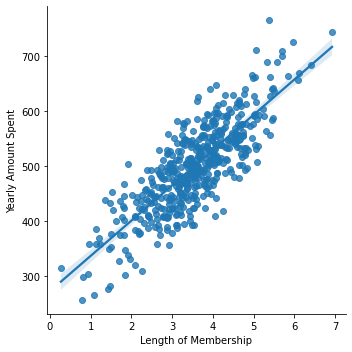

In [10]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=customers,legend=True)

In [11]:
X=customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
Y=customers['Yearly Amount Spent']

In [12]:
from sklearn.model_selection import train_test_split
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#X = le.fit_transform(X)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train,Y_train)

LinearRegression()

In [17]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.66945486 38.92121373  0.16694469 61.11169284]


In [18]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'Predicted Y Values')

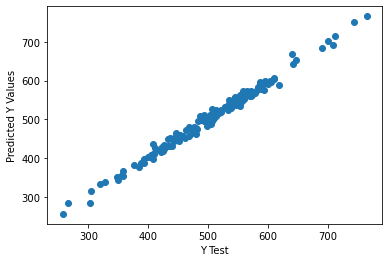

In [19]:
plt.scatter(x=Y_test,y=predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y Values')

In [20]:
from sklearn import metrics

In [21]:
print('Mean Absolute Error, MAE: ',metrics.mean_absolute_error(Y_test,predictions))
print('Mean Squared Error, MSE: ',metrics.mean_squared_error(Y_test,predictions))
print('Root Mean Squared Error, RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

Mean Absolute Error, MAE:  7.623193654326224
Mean Squared Error, MSE:  91.32748688947085
Root Mean Squared Error, RMSE:  9.55654157577263


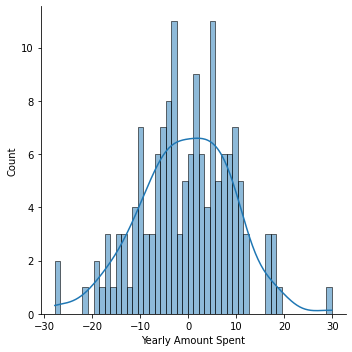

In [27]:
sns.displot((Y_test - predictions), bins=50, kde=True)

In [28]:
lm.coef_

array([25.66945486, 38.92121373,  0.16694469, 61.11169284])

In [29]:
X_train.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [30]:
cdf = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficients'])

In [31]:
cdf

,Coefficients
Avg. Session Length,25.669455
Time on App,38.921214
Time on Website,0.166945
Length of Membership,61.111693


We can see that the Coefficient value is highest for Length of membership and lowest for Time on Website. As these are calculated against the Yearly Amount Spend by the customer, it is advisable to work more on the website so that it catches up to the App.